# Guess Who?

Aswin van Woudenberg (https://www.aswinvanwoudenberg.com | https://github.com/afvanwoudenberg)

## Introduction

*Guess who?* is a game in which two players try to guess the opponent's character by asking yes-no questions. Each player starts the game with a board that includes cartoon images of 24 people and their first names with all the images standing up. Each player selects a card of their choice from a separate pile of cards containing the same 24 images. The objective of the game is to be the first to determine which card one's opponent has selected. Players alternate asking various yes-no questions to eliminate candidates, such as:

* "Does your person wear a hat?"
* "Does your person wear glasses?"
* "Is your person female?"

The player will then eliminate candidates (based on the opponent's response) by flipping those images down until only one is left. Well-crafted questions allow players to eliminate many cards at once.

Various webpages explain strategies to beat your opponent. One often cited article (https://chalkdustmagazine.com/blog/cracking-guess-board-game/) claims there are only 22 valid questions one can ask and provides a decision tree that describes the optimal order in which to ask these questions. I'm not sure where this claim of only 22 valid questions comes from. I couldn't find other references to back this statement. One of the questions was whether the person had any *hair stuff*. It is unclear to me what was meant by this. I thought it may have meant things characters wear in or on their hair, like a hat or ribbons, but the table that listed all characters and their traits didn't list Eric as having any *hair stuff* while he does wear a hat. There were a few other errors in this table, such as incorrectly describing Max as having brown hair. (His hair is black). These errors made me question the accuracy of the decision tree that the author came up with.

In this Jupyter Notebook we'll use sklearn and Python to come up with a decision tree classifier ourselves. We'll use this tree to make the computer play *Guess who?*

## Import libraries

We start by importing some Python libraries.

In [1]:
import pandas as pd
import numpy as np

from ipywidgets import GridspecLayout, HTML, VBox, HBox, Button, Label

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

## Load data

The dataframe below describe traits of the 24 characters. Each trait is a question the can be asked. The data is taken from the aforementioned article, but I left out the *hair stuff* question. I also removed any errors. Let me know if I missed one.

You can easily add your own questions. You might want to ask 'creative' questions like:

* "Does your person have the letter E in their name?"
* "Does the name start with a letter from A-L?"

You could also ask questions that combine two (or more) traits, like:

* "Is your character either female or bald?"

The question about *facial hair* is actually a combination of the traits *moustache* and *beard*.

Also note that this data is based on the original characters. After the initial release new characters have been introduced, so the data below might be different from your own set.

In [2]:
df = pd.DataFrame({
    # hair style
    'hair_partition': [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], 
    'curly_hair':     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    'hat':            [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'bald':           [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    'long_hair':      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    # hair color
    'ginger_hair':    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'white_hair':     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    'brown_hair':     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    'blond_hair':     [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'black_hair':     [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
    # facial attributes
    'big_mouth':      [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    'big_nose':       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
    'red_cheeks':     [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
    'blue_eyes':      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    'sad_looking':    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    # facial hair
    'facial_hair':    [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
    'moustache':      [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    'beard':          [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    # other
    'glasses':        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    'earrings':      [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'female':         [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    # names
    'name':           ['alex', 'alfred', 'anita', 'anne', 'bernard', 'bill', 'charles', 'claire', 
                       'david', 'eric', 'frans', 'george', 'herman', 'joe', 'maria', 'max', 'paul', 
                       'peter', 'philip', 'richard', 'robert', 'sam', 'susan', 'tom']
})

Each trait corresponds to a question. The dictionary below maps each trait to a valid yes-no question. Don't forget to add more keys if you come up with additional questions.

In [3]:
column_description = {
    "hair_partition": "Does this person have a hair partition?",
    "curly_hair": "Does this person have curly hair?",
    "hat": "Does this person wear a hat?",
    "bald": "Is this person bald?",
    "long_hair": "Does this person have long hair?",
    "ginger_hair": "Does this person have ginger hair?",
    "white_hair": "Does this person have white hair?",
    "brown_hair": "Does this person have brown hair?",
    "blond_hair": "Does this person have blond hair?",
    "black_hair": "Does this person have black hair?",
    "big_mouth": "Does this person have a big mouth?",
    "big_nose": "Does this person have a big nose?",
    "red_cheeks": "Does this person have red cheeks?",
    "blue_eyes": "Does this person have blue eyes?",
    "sad_looking": "Does this person look sad?",
    "facial_hair": "Does this person have facial hair?",
    "moustache": "Does this person have a moustache?",
    "beard": "Does this person have a beard?",
    "glasses": "Does this person wear glasses?",
    "earrings": "Does this person wear earrings?",
    "female": "Is this person female?"
}

## Tree induction

Next we train a DecisionTreeClassifier on our data.

In [4]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [5]:
feature_names = list(df.columns)[:-1]
target_name = df.columns[-1]

By default the sklearn DecisionTreeClassifier uses Gini impurity as a splitting criteria. In this case _information gain_ works slightly better, so we select entropy here.

In [6]:
clf = DecisionTreeClassifier(criterion = "entropy")
model = clf.fit(X, y)

## Exploring the decision tree

We can print a text representation of our decision tree to get an idea of what it looks like.

In [7]:
text_representation = export_text(model, feature_names=feature_names)
print(text_representation)

|--- big_mouth <= 0.50
|   |--- ginger_hair <= 0.50
|   |   |--- glasses <= 0.50
|   |   |   |--- long_hair <= 0.50
|   |   |   |   |--- curly_hair <= 0.50
|   |   |   |   |   |--- sad_looking <= 0.50
|   |   |   |   |   |   |--- class: richard
|   |   |   |   |   |--- sad_looking >  0.50
|   |   |   |   |   |   |--- class: bernard
|   |   |   |   |--- curly_hair >  0.50
|   |   |   |   |   |--- class: anne
|   |   |   |--- long_hair >  0.50
|   |   |   |   |--- red_cheeks <= 0.50
|   |   |   |   |   |--- class: maria
|   |   |   |   |--- red_cheeks >  0.50
|   |   |   |   |   |--- class: anita
|   |   |--- glasses >  0.50
|   |   |   |--- white_hair <= 0.50
|   |   |   |   |--- bald <= 0.50
|   |   |   |   |   |--- class: joe
|   |   |   |   |--- bald >  0.50
|   |   |   |   |   |--- class: tom
|   |   |   |--- white_hair >  0.50
|   |   |   |   |--- bald <= 0.50
|   |   |   |   |   |--- class: paul
|   |   |   |   |--- bald >  0.50
|   |   |   |   |   |--- class: sam
|   |--- ginger_

The depth of the tree tells us how many questions we need to ask *at most*. Ideally you would want to do a binary search by splitting the number of possible characters in half with each question. By getting creative with adding new questions you should be able to get to a decision tree with a maximum depth of 4.

In [8]:
model.get_depth()

6

If we plot the tree graphically the result is pretty illegible. We can tell however that most characters can be guessed in 4 or 5 moves. Only two characters need a 6th question.

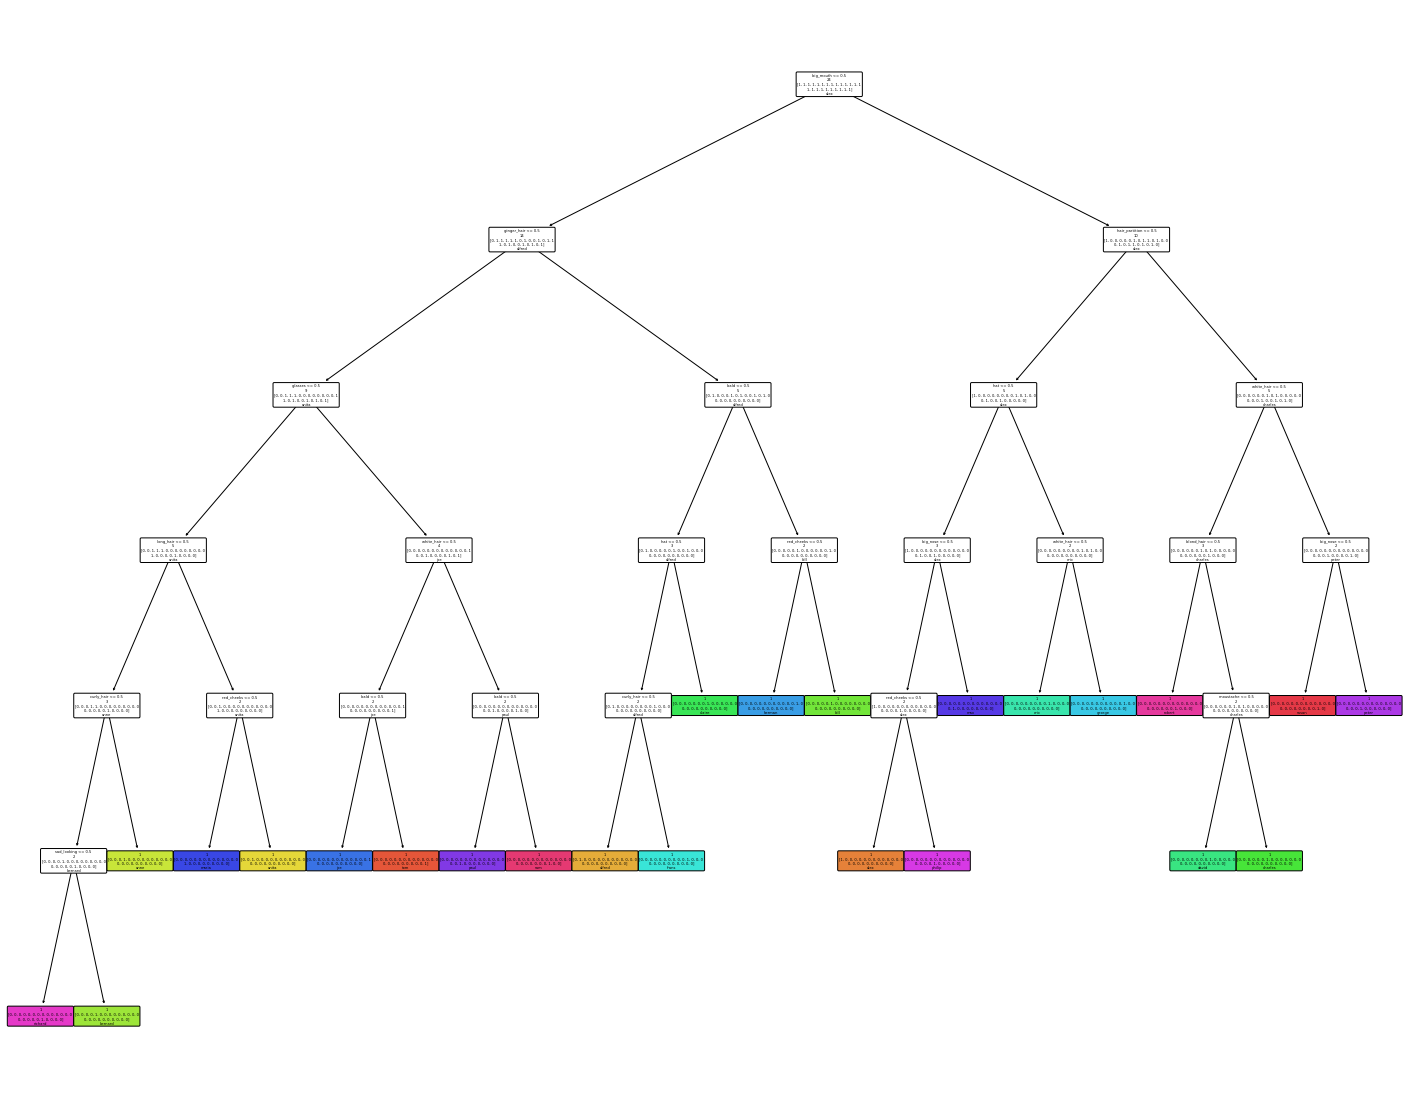

In [9]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=feature_names, class_names=y, label='none', node_ids=False, impurity=False, rounded=True, filled=True)

## A user interface

In the code below we create a simple GUI using Jupyter widgets to play the game. The pictures were taken from this website: https://guesswhocharacters.info/. Check out this website if you want to learn about the backstories of the various characters.

In [10]:
grid = GridspecLayout(3, 8)
grid.width = "1400px"

for i in range(3):
    for j in range(8):
        grid[i, j] = HTML(value="<img src='https://guesswhocharacters.info/imgs/{}.jpeg' width=162 height=237>".format(str(df.name[i*8+j])))

label = Label(value="Put the questions and answer here")
buttonYes = Button(description="Yes")
buttonNo = Button(description="No")
buttonPlayAgain = Button(description="Play again")
hbox = HBox([label, buttonYes, buttonNo, buttonPlayAgain])
vbox = VBox([grid, hbox])

The tree can be traversed programmatically with Python. The root node of the tree will have an id of 0 which is where we start out search.

In [11]:
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
value = clf.tree_.value

# Start at root
node_id = 0

The functions below traverses the tree based on what button you press and updates the GUI.

In [12]:
def updateGUI():
    if children_left[node_id] == children_right[node_id]:
        label.value = "This person is " + y[np.argmax(value[node_id])].capitalize()
        buttonYes.layout.display = 'none'
        buttonNo.layout.display = 'none'
        buttonPlayAgain.layout.display = 'block'
    else:
        label.value = column_description[df.columns[feature[node_id]]]
        buttonYes.layout.display = 'block'
        buttonNo.layout.display = 'block'
        buttonPlayAgain.layout.display = 'none'

def showAllCards():
    for i in range(3):
        for j in range(8):
            grid[i, j].layout.visibility = 'visible'

def hideCards(attribute, val):
    for i in range(3):
        for j in range(8):
            if df[attribute][i*8+j] == val:
                grid[i, j].layout.visibility = 'hidden'
        
def on_buttonYes_clicked(b):
    global node_id
    hideCards(df.columns[feature[node_id]], 0)
    node_id = children_right[node_id]
    updateGUI()

def on_buttonNo_clicked(b):
    global node_id
    hideCards(df.columns[feature[node_id]], 1)
    node_id = children_left[node_id]
    updateGUI()

def on_buttonPlayAgain_clicked(b):
    global node_id
    showAllCards()
    node_id = 0
    updateGUI()
    
buttonYes.on_click(on_buttonYes_clicked)
buttonNo.on_click(on_buttonNo_clicked)
buttonPlayAgain.on_click(on_buttonPlayAgain_clicked)

updateGUI()

Finally we display the GUI.

In [13]:
display(vbox)